In [1]:
from IPython.display import Image
import os
import pandas as pd
import seaborn as sns
import cv2
from PIL import Image

from icecream import ic #for debug
import requests #for http requests

from flask import Flask
from flask_restful import Resource, Api, reqparse
from io import BytesIO

import PIL
from pathlib import Path
from PIL import UnidentifiedImageError
import shutil 



In [3]:
__file__ = 'C:/Users/mxggis/wic2023/AIComponent/Utilities/yolov5_ws/yolov5/dataloaders.py'

In [4]:
# !python yolov5_ws/yolov5/detect.py --weights yolov5_ws/yolov5/runs/train/exp/weights

# /last.pt --img 320 --conf 0.2 --source yolov5_ws/CroppedImages

In [5]:
pwd

'C:\\Users\\mxggis\\Documents\\Python Scripts\\Linton_ImageAnalysis'

In [2]:
pwd


'C:\\Users\\mxggis\\wic2023\\wic2023\\AIComponent\\Utilities'

In [6]:
# %load C:/Users/mxggis/Documents/Python Scripts/Linton_ImageAnalysis/yolov5_ws/yolov5/detect.py
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
"""
Run YOLOv5 detection inference on images, videos, directories, globs, YouTube, webcam, streams, etc.

Usage - sources:
    $ python detect.py --weights yolov5s.pt --source 0                               # webcam
                                                     img.jpg                         # image
                                                     vid.mp4                         # video
                                                     path/                           # directory
                                                     'path/*.jpg'                    # glob
                                                     'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                                                     'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream

Usage - formats:
    $ python detect.py --weights yolov5s.pt                 # PyTorch
                                 yolov5s.torchscript        # TorchScript
                                 yolov5s.onnx               # ONNX Runtime or OpenCV DNN with --dnn
                                 yolov5s_openvino_model     # OpenVINO
                                 yolov5s.engine             # TensorRT
                                 yolov5s.mlmodel            # CoreML (macOS-only)
                                 yolov5s_saved_model        # TensorFlow SavedModel
                                 yolov5s.pb                 # TensorFlow GraphDef
                                 yolov5s.tflite             # TensorFlow Lite
                                 yolov5s_edgetpu.tflite     # TensorFlow Edge TPU
                                 yolov5s_paddle_model       # PaddlePaddle
"""

import argparse
import os
import platform
import sys
from pathlib import Path

import torch

FILE = Path(__file__).resolve()
ROOT = FILE.parents[0]  # YOLOv5 root directory
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))  # add ROOT to PATH
ROOT = Path(os.path.relpath(ROOT, Path.cwd()))  # relative

from models.common import DetectMultiBackend
from utils.dataloaders import IMG_FORMATS, VID_FORMATS, LoadImages, LoadScreenshots, LoadStreams
from utils.general import (LOGGER, Profile, check_file, check_img_size, check_imshow, check_requirements, colorstr, cv2,
                           increment_path, non_max_suppression, print_args, scale_boxes, strip_optimizer, xyxy2xywh)
from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, smart_inference_mode

@smart_inference_mode()
def run(
        weights=ROOT / 'yolov5s.pt',  # model path or triton URL
        source=ROOT / 'data/images',  # file/dir/URL/glob/screen/0(webcam)
        data=ROOT / 'data/coco128.yaml',  # dataset.yaml path
        imgsz=(640, 640),  # inference size (height, width)
        conf_thres=0.25,  # confidence threshold
        iou_thres=0.35,  # NMS IOU threshold
        max_det=1000,  # maximum detections per image
        device='',  # cuda device, i.e. 0 or 0,1,2,3 or cpu
        view_img=True,  # show results
        save_txt=False,  # save results to *.txt
        save_conf=False,  # save confidences in --save-txt labels
        save_crop=False,  # save cropped prediction boxes
        nosave=False,  # do not save images/videos
        classes=None,  # filter by class: --class 0, or --class 0 2 3
        agnostic_nms=False,  # class-agnostic NMS
        augment=False,  # augmented inference
        visualize=False,  # visualize features
        update=False,  # update all models
        project=ROOT / 'runs/detect',  # save results to project/name
        name='exp',  # save results to project/name
        exist_ok=False,  # existing project/name ok, do not increment
        line_thickness=3,  # bounding box thickness (pixels)
        hide_labels=False,  # hide labels
        hide_conf=False,  # hide confidences
        half=False,  # use FP16 half-precision inference
        dnn=False,  # use OpenCV DNN for ONNX inference
        vid_stride=1,  # video frame-rate stride
        fileName = None
):
    source = str(source)
    save_img = not nosave and not source.endswith('.txt')  # save inference images
    is_file = Path(source).suffix[1:] in (IMG_FORMATS + VID_FORMATS)
    is_url = source.lower().startswith(('rtsp://', 'rtmp://', 'http://', 'https://'))
    webcam = source.isnumeric() or source.endswith('.txt') or (is_url and not is_file)
    screenshot = source.lower().startswith('screen')
    if is_url and is_file:
        source = check_file(source)  # download

    # Directories
    save_dir = increment_path(Path(project) / name, exist_ok=exist_ok)  # increment run
    (save_dir / 'labels' if save_txt else save_dir).mkdir(parents=True, exist_ok=True)  # make dir
    save_dir = save_dir/fileName
    # Load model
    device = select_device(device)
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
    stride, names, pt = model.stride, model.names, model.pt
    imgsz = check_img_size(imgsz, s=stride)  # check image size

    # Dataloader
    bs = 1  # batch_size
    if webcam:
        view_img = check_imshow(warn=True)
        dataset = LoadStreams(source, img_size=imgsz, stride=stride, auto=pt, vid_stride=vid_stride)
        print(dataset)
        bs = len(dataset)
    elif screenshot:
        dataset = LoadScreenshots(source, img_size=imgsz, stride=stride, auto=pt)
    else:
        dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt, vid_stride=vid_stride,resizeImageValue=299,centerCrop=True,centerCrop_val=[35,50,60,75])
    vid_path, vid_writer = [None] * bs, [None] * bs
    # Run inference
    model.warmup(imgsz=(1 if pt or model.triton else bs, 3, *imgsz))  # warmup
    seen, windows, dt = 0, [], (Profile(), Profile(), Profile())
    facetDetection=0
    nofacetDetection = 0
    for path, im, im0s, vid_cap, s in dataset:
        # ic(im)
        # ic(im0s)
        # img = Image.fromarray(im0s, 'RGB')
        # img.save('my.png')
        # img.show()
        
        with dt[0]:
            im = torch.from_numpy(im).to(model.device)
            im = im.half() if model.fp16 else im.float()  # uint8 to fp16/32
            im /= 255  # 0 - 255 to 0.0 - 1.0
            if len(im.shape) == 3:
                im = im[None]  # expand for batch dim

        # Inference
        with dt[1]:
            visualize = increment_path(save_dir / Path(path).stem, mkdir=True) if visualize else False
            # take im and crop and resize
            pred = model(im, augment=augment, visualize=visualize)
            
        # NMS
        with dt[2]:
            pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)

        # Second-stage classifier (optional)
        # pred = utils.general.apply_classifier(pred, classifier_model, im, im0s)

        # Class 1:Facet
        # Class 2: NoFacet
        
        # Process predictions

        for i, det in enumerate(pred):  # per image
            seen += 1
            if webcam:  # batch_size >= 1
                p, im0, frame = path[i], im0s[i].copy(), dataset.count
                s += f'{i}: '
            else:
                p, im0, frame = path, im0s.copy(), getattr(dataset, 'frame', 0)

            p = Path(p)  # to Path
            save_path = str(save_dir / p.name)  # im.jpg
            txt_path = str(save_dir / 'labels' / p.stem) + ('' if dataset.mode == 'image' else f'_{frame}')  # im.txt
            s += '%gx%g ' % im.shape[2:]  # print string
            gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # normalization gain whwh
            imc = im0.copy() if save_crop else im0  # for save_crop
            annotator = Annotator(im0, line_width=line_thickness, example=str(names))
           
            if len(det):
                # Rescale boxes from img_size to im0 size
                det[:, :4] = scale_boxes(im.shape[2:], det[:, :4], im0.shape).round()

                # Print results
                for c in det[:, 5].unique():
                    n = (det[:, 5] == c).sum()  # detections per class
                    s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string
                    classLabel = names[int(c)]
                    if(classLabel=='Facet'):
                        facetDetection = facetDetection + 1
                    elif (classLabel == 'NoFacet'):
                        nofacetDetection=nofacetDetection+1

                # Write results
                for *xyxy, conf, cls in reversed(det):
                    if save_txt:  # Write to file
                        xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()  # normalized xywh
                        line = (cls, *xywh, conf) if save_conf else (cls, *xywh)  # label format
                        with open(f'{txt_path}.txt', 'a') as f:
                            f.write(('%g ' * len(line)).rstrip() % line + '\n')

                    if save_img or save_crop or view_img:  # Add bbox to image
                        c = int(cls)  # integer class
                        label = None if hide_labels else (names[c] if hide_conf else f'{names[c]} {conf:.2f}')
                        annotator.box_label(xyxy, label, color=colors(c, True))
                    if save_crop:
                        save_one_box(xyxy, imc, file=save_dir / 'crops' / names[c] / f'{p.stem}.jpg', BGR=True)

            # Stream results
            im0 = annotator.result()
            if view_img:
                if platform.system() == 'Linux' and p not in windows:
                    windows.append(p)
                    cv2.namedWindow(str(p), cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO)  # allow window resize (Linux)
                    cv2.resizeWindow(str(p), im0.shape[1], im0.shape[0])
                cv2.imshow(str(p), im0)
                cv2.waitKey(1)  # 1 millisecond

            # Save results (image with detections)
            if save_img:
                if dataset.mode == 'image':
                    cv2.imwrite(save_path, im0)
                else:  # 'video' or 'stream'
                    if vid_path[i] != save_path:  # new video
                        
                        vid_path[i] = save_path
                        if isinstance(vid_writer[i], cv2.VideoWriter):
                            vid_writer[i].release()  # release previous video writer
                        if vid_cap:  # video
                            fps = vid_cap.get(cv2.CAP_PROP_FPS)
                            w = int(vid_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                            h = int(vid_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                        else:  # stream
                            fps, w, h = 30, im0.shape[1], im0.shape[0]
                            
                        save_path = str(Path(save_path).with_suffix('.mp4'))  # force *.mp4 suffix on results videos
                        #vid_writer[i] = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))
                        vid_writer[i] = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'mp4v'), 1, (im0.shape[1], im0.shape[0]))
                    vid_writer[i].write(im0)

        # Print time (inference-only)
        #LOGGER.info(f"{s}{'' if len(det) else '(no detections), '}{dt[1].dt * 1E3:.1f}ms")
    print("Total Facet Images Predicted:",facetDetection)
    print("Total No Facet Images Predicted:",nofacetDetection)
    # Print results
    t = tuple(x.t / seen * 1E3 for x in dt)  # speeds per image
    # LOGGER.info(f'Speed: %.1fms pre-process, %.1fms inference, %.1fms NMS per image at shape {(1, 3, *imgsz)}' % t)
    if save_txt or save_img:
        s = f"\n{len(list(save_dir.glob('labels/*.txt')))} labels saved to {save_dir / 'labels'}" if save_txt else ''
        LOGGER.info(f"Results saved to {colorstr('bold', save_dir)}{s}")
    if update:
        strip_optimizer(weights[0])  # update model (to fix SourceChangeWarning)
    return facetDetection,nofacetDetection


def parse_opt():
    parser = argparse.ArgumentParser()
    parser.add_argument('--weights', nargs='+', type=str, default=ROOT / 'yolov5s.pt', help='model path or triton URL')
    parser.add_argument('--source', type=str, default=ROOT / 'data/images', help='file/dir/URL/glob/screen/0(webcam)')
    parser.add_argument('--data', type=str, default=ROOT / 'data/coco128.yaml', help='(optional) dataset.yaml path')
    parser.add_argument('--imgsz', '--img', '--img-size', nargs='+', type=int, default=[640], help='inference size h,w')
    parser.add_argument('--conf-thres', type=float, default=0.25, help='confidence threshold')
    parser.add_argument('--iou-thres', type=float, default=0.45, help='NMS IoU threshold')
    parser.add_argument('--max-det', type=int, default=1000, help='maximum detections per image')
    parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
    parser.add_argument('--view-img', action='store_true', help='show results')
    parser.add_argument('--save-txt', action='store_true', help='save results to *.txt')
    parser.add_argument('--save-conf', action='store_true', help='save confidences in --save-txt labels')
    parser.add_argument('--save-crop', action='store_true', help='save cropped prediction boxes')
    parser.add_argument('--nosave', action='store_true', help='do not save images/videos')
    parser.add_argument('--classes', nargs='+', type=int, help='filter by class: --classes 0, or --classes 0 2 3')
    parser.add_argument('--agnostic-nms', action='store_true', help='class-agnostic NMS')
    parser.add_argument('--augment', action='store_true', help='augmented inference')
    parser.add_argument('--visualize', action='store_true', help='visualize features')
    parser.add_argument('--update', action='store_true', help='update all models')
    parser.add_argument('--project', default=ROOT / 'runs/detect', help='save results to project/name')
    parser.add_argument('--name', default='exp', help='save results to project/name')
    parser.add_argument('--exist-ok', action='store_true', help='existing project/name ok, do not increment')
    parser.add_argument('--line-thickness', default=3, type=int, help='bounding box thickness (pixels)')
    parser.add_argument('--hide-labels', default=False, action='store_true', help='hide labels')
    parser.add_argument('--hide-conf', default=False, action='store_true', help='hide confidences')
    parser.add_argument('--half', action='store_true', help='use FP16 half-precision inference')
    parser.add_argument('--dnn', action='store_true', help='use OpenCV DNN for ONNX inference')
    parser.add_argument('--vid-stride', type=int, default=1, help='video frame-rate stride')
    opt = parser.parse_args()
    opt.imgsz *= 2 if len(opt.imgsz) == 1 else 1  # expand
    print_args(vars(opt))
    return opt


def main(opt):
    check_requirements(exclude=('tensorboard', 'thop'))
    #run(**vars(opt))
    facet_detected,noFacetDetected = run(**opt)
    totalFacetPredicted=facet_detected
    totalNoFacetPredicted=noFacetDetected
    
    


if __name__ == "__main__":
    print(ROOT)
    options = {
        #'weights': ['yolov5_ws/yolov5/runs/train/exp/weights/best.pt'], 
               'weights': [ROOT / 'runs/train/exp6/weights/best.pt'],
     'source': 'C:/Users/mxggis/Documents/Python Scripts/Linton_ImageAnalysis/yolov5_ws/CroppedImages/FulllengthImages',
     #'source': 'Z:/Data/Image Data/Video/project.avi', 
     
     'data': ROOT / 'data/dataset.yaml', 
     'imgsz': [640,640], 
     'conf_thres': 0.50, 
     'iou_thres': 0.45, 
     'max_det': 1000, 
     'device': '', 
     'view_img': True, 
     'save_txt': False, 
     'save_conf': False, 
     'save_crop': True, 
     'nosave': False, 
     'classes': None, 
     'agnostic_nms': False, 
     'augment': True, 
     'visualize': False, 
     'update': False,
     'project': ROOT / 'runs/detect', 
     'name': 'exp', 
     'exist_ok': False, 
     'line_thickness': 2 , 
     'hide_labels': False, 
     'hide_conf': False, 
     'half': False, 
     'dnn': False, 
     'vid_stride': 1,
      'fileName': ""
    }
    #opt = parse_opt()
    main(options)


yolov5_ws\yolov5


YOLOv5  2023-2-22 Python-3.9.13 torch-1.10.2 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

Results saved to yolov5_ws\yolov5\runs\detect\exp28


Total Facet Images Predicted: 33
Total No Facet Images Predicted: 33


In [10]:
!python yolov5_ws/yolov5/detect.py --weights runs/train/exp6/weights/best.pt --source C:/Users/mxggis/Documents/PythonScripts/Linton_ImageAnalysis/yolov5_ws/CroppedImages/FulllengthImages  --imgsz (640, 640) --img 640 --conf 0.50 --iou_thres 0.45 --view_img True --resize True --resize-image-val 299 --crop True --crop-val [35,50,60,75] 

<bound method ArgumentParser.parse_args of ArgumentParser(prog='detect.py', usage=None, description=None, formatter_class=<class 'argparse.HelpFormatter'>, conflict_handler='error', add_help=True)>


detect: 
YOLOv5  v6.2-242-g9dd40f07 Python-3.9.13 torch-1.10.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 C:\Users\mxggis\Documents\PythonScripts\Linton_ImageAnalysis\yolov5_ws\yolov5\data\images\bus.jpg: 544x640 (no detections), 286.8ms
image 2/2 C:\Users\mxggis\Documents\PythonScripts\Linton_ImageAnalysis\yolov5_ws\yolov5\data\images\zidane.jpg: 544x640 (no detections), 252.9ms
Speed: 1.0ms pre-process, 269.8ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5_ws\yolov5\runs\detect\exp49


In [ ]:
Documents/Python Scripts/Linton_ImageAnalysis/yolov5_ws/yolov5/detect.py

In [9]:
totalFacetImages = len(os.listdir(fileName_Facet))
totalNoFacetImages = len(os.listdir(fileName_NoFacet))
print('Total Facet Images:',totalFacetImages)
print('-'*25)
print('Total NoFacet Images:',totalNoFacetImages)
print('-'*25)
# print('Total Facet Images Predicted', totalFacetPredicted)
# print('Total NoFacet Images Predicted', totalNoFacetPredicted)


Total Facet Images: 48
-------------------------
Total NoFacet Images: 48
-------------------------


In [13]:
#1: Facet
#0: NoFacet
y_test = [0]*totalFacetImages
y_test_1 = [1]*totalNoFacetImages
y_test = y_test+y_test_1
print(y_test)
y_pred = y_test

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [12]:
from sklearn.metrics import confusion_matrix

In [14]:

def get_confusion_matrix(y_test, y_pred):

  cm = confusion_matrix(y_test, y_pred)

  print('Confusion matrix\n\n', cm)

  print('\nTrue Positives(TP) = ', cm[0,0])

  print('\nTrue Negatives(TN) = ', cm[1,1])

  print('\nFalse Positives(FP) = ', cm[0,1])

  print('\nFalse Negatives(FN) = ', cm[1,0])

  return cm

In [21]:
cm=get_confusion_matrix(y_test,y_pred)

Confusion matrix

 [[48  0]
 [ 0 48]]

True Positives(TP) =  48

True Negatives(TN) =  48

False Positives(FP) =  0

False Negatives(FN) =  0


<AxesSubplot: >

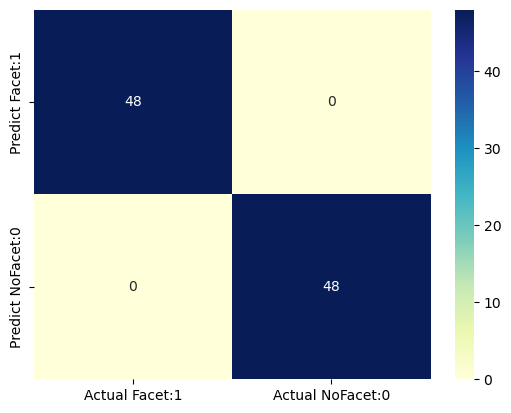

In [28]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Facet:1', 'Actual NoFacet:0'], 
                                 index=['Predict Facet:1', 'Predict NoFacet:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [25]:
predicted_Facet_dir= 'yolov5_ws\\yolov5\\runs\\detect\\exp16\\yolov5_ws\\CroppedImages\\Facet'
predicted_NoFacet_dir = 'yolov5_ws\\yolov5\\runs\\detect\\exp16\\yolov5_ws\\CroppedImages\\NoFacet'
test_Facet_fnames = os.listdir(predicted_Facet_dir)
test_NoFacet_fnames = os.listdir(predicted_NoFacet_dir)

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(100, 100)


<Figure size 10000x10000 with 0 Axes>

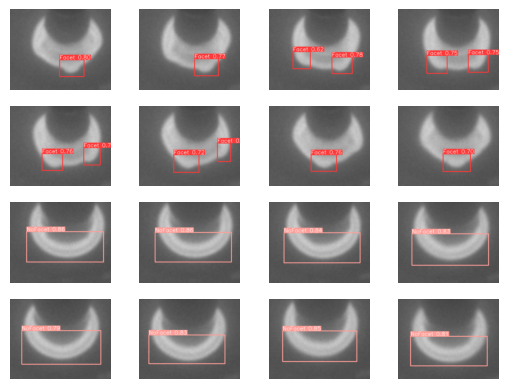

In [27]:
pic_index += 8
next_facet_pix = [os.path.join(predicted_Facet_dir, fname) 
                for fname in test_Facet_fnames[pic_index-8:pic_index]]
next_nofacet_pix = [os.path.join(predicted_NoFacet_dir, fname) 
                for fname in test_NoFacet_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_facet_pix+next_nofacet_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()